# Banking dataset of defferent customers to predict if they will buy term diposit or not


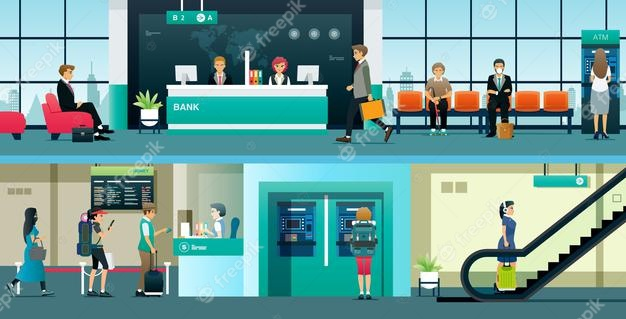


# Table of Contents
- [Business Understanding](#business)
- [Data Understanding](#data)
- [Data Preparation](#eda)
- [Evaluation](#eva)


<a id='business'></a>
## Business Understanding

For this project I decided to analyse the bank customers' marketingdata from Kaggle.
Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.
Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. 
Here I have tried to do basic analysis of the data and understand various contributing features:

-	Customer personal details (age, sex, address etc.)
-	Social Profiles (married or unmarried)
-	Education levels
-	Job profiles and the roles they play (are they in junior role, mid level, senior managers, executives, type of industry etc.)
-	Do the customers have their own property? And do they have active ongoing mortgages? 

### Business questions:
1. What is the Median age of the people saying yes to Term deposit?
2. What is average yearly balance of people rejecting the product?
3. What is the education qualification of most of the banck customers who have taken loan?


<a id='data'></a>
## 2. Data Understanding

Data Link : https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets


The data is related to the direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client 
was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') 
subscribed by the customer or not. The data folder contains two datasets:-

train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010)

test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv

### Detailed Column Descriptions:

•	age (numeric)                        
•	job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
•	      "blue-collar","self-employed","retired","technician","services")                     
•	marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)          
•	education (categorical: "unknown","secondary","primary","tertiary")                        
•	default: has credit in default? (binary: "yes","no")                          
•	balance: average yearly balance, in euros (numeric)                                  
•	housing: has housing loan? (binary: "yes","no")                                    
•	loan: has personal loan? (binary: "yes","no")                              


### Related with the last contact of the current campaign:
•	contact: contact communication type (categorical: "unknown","telephone","cellular")    
•	day: last contact day of the month (numeric)                                    
•	month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")                                      
•	duration: last contact duration, in seconds (numeric)                                                     


### Other attributes:
•	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)           
•	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client     was not previously contacted)                                
•	previous: number of contacts performed before this campaign and for this client (numeric)                   
•	poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")           
•	Output variable (desired target) : y - has the client subscribed a term deposit? (binary: "yes","no")


Missing Attribute Values: None



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv",sep=";")
test = pd.read_csv("test.csv",sep=";")

In [4]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<a id='eda'></a>
## 3. Data Preparation

### Data types from Training Data

In [6]:
train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

### Basic Stats of Numeric Columns in Training Data

In [7]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# Check for null values
train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Since I'm doing basic analysis of the data nospecific data preparation like changing data types etc is required. Also there are no null values in the data.

<a id='eva'></a>
## 4. Evaluation

### Target Column Analysis : Class yes and No distribution

In [12]:
train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [13]:
train['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### Pie chart analysis of target column

<AxesSubplot:ylabel='y'>

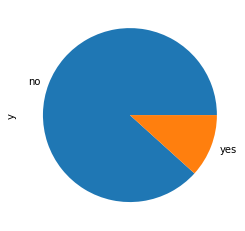

In [14]:
train['y'].value_counts().plot(kind='pie')

####  Explanation : There are a smaller number of 'Yes' than 'No'. Above analysis shows that we have only 0.1% yes as compared to 0.88% No. If we were applying any modelling techniques then we need to consider this as most of the algorithms do not work well with imbalanced datasets. In such cases resampling the training dataset, using right evaluation metrics are the necessary steps.


### Visualization of various features:

###  Age distribution

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

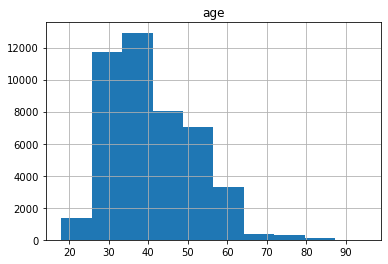

In [15]:
train_num.iloc[:,:1].hist()

#### Explanation : As expected Age distribution is rightly skewed and most of the  customers fall in the 25 to 55 age category. 

## Pie chart analysis of various columns where customer has subscribed for  the term deposit

### 1. Education 

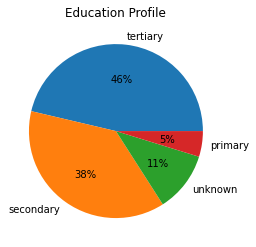

In [16]:
plt.pie(train.loc[train['y'] == 'yes','education'].value_counts(),labels=train['education'].unique(),autopct='%0.0f%%')
plt.title('Education Profile')
plt.show(); 

#### Explanation : The customers who have opted in for the term deposit fall into either secondary(38%) or tertiary (46%) categories

### 2. Job Profile

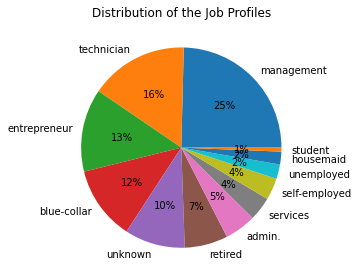

In [17]:
plt.pie(train.loc[train['y'] == 'yes','job'].value_counts(),labels=train['job'].unique(),autopct='%0.0f%%' )
plt.title('Distribution of the Job Profiles')
plt.tight_layout()
plt.show(); 

#### Explanation : The customers who have opted in for the term deposit are mostly in the technical or high profile jobs.

### 3. Marital Status

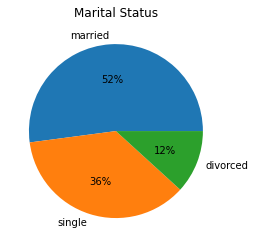

In [18]:
plt.pie(train.loc[train['y'] == 'yes','marital'].value_counts(),labels=train['marital'].unique(), autopct='%0.0f%%')
plt.title('Marital Status')
plt.show(); 

#### Explanation : The customers who are married have mainly opted in for the term deposit 

### 4. Personal Loan distribution

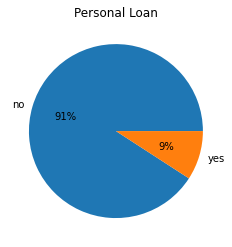

In [19]:
plt.pie(train.loc[train['y'] == 'yes','loan'].value_counts(),labels=train['loan'].unique(),autopct='%0.0f%%')
plt.title('Personal Loan')
plt.show(); 

#### Explanation : The customers who have opted in for the term deposit  do not have any other personal loan. Only 9% customers have personal loan.

### 5. Housing Loan 

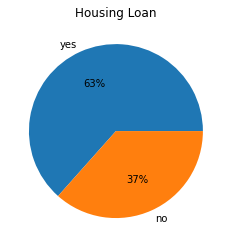

In [20]:
plt.pie(train.loc[train['y'] == 'yes','housing'].value_counts(),labels=train['housing'].unique(),autopct='%0.0f%%')
plt.title('Housing Loan')
plt.show(); 

#### Explanation : Most of the customers who have housing loan(63%) have opted in for the term deposit . 

### Question 1 : What is median age of people saying 'yes' to the product ?

In [21]:
train.loc[train['y'] == 'yes','age'].median()

38.0

#### Median age of the people saying yes to Term deposit is 38

### Question 2 : What is average yearly balance of people rejecting the product?

In [22]:
train.loc[train['y'] == 'no','balance'].describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

#### Third quartile of balance (average yearly balance) of people rejecting the product is 1345 Euros

### Question 3 : What is education qualification of most of the bank customers who have taken loan ?

In [72]:
train['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [73]:

train.loc[train['loan'] == 'yes','education'].value_counts()

secondary    4303
tertiary     1784
primary      1024
unknown       133
Name: education, dtype: int64

#### Education qualification of most of the bank customers who have taken personal loan is 'secondary'